<a href="https://colab.research.google.com/github/OlimpiaGarcia/Book_algorithm/blob/main/pre_procesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import missingno  as msno
import ast

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Creacion de DF

## leer CSV y pasarlo a DF

In [ ]:
data = pd.read_csv('Book_Details.csv')
data.sample(10)

,Unnamed: 0,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
11448,11448,7689323,https://images-na.ssl-images-amazon.com/images...,"Varney, the Vampyre","Varney the Vampire; or, the Feast of Blood had...","['1166 pages, Paperback']","['First published January 1, 1845']",https://www.goodreads.com/author/show/1031911....,James Malcolm Rymer,['1166'],"['Horror', 'Vampires', 'Classics', 'Gothic', '...",1487,107,3.40,"{'5': '339', '4': '343', '3': '478', '2': '228..."
6808,6808,447095,https://images-na.ssl-images-amazon.com/images...,Lord Grizzly,"True-life adventurer Hugh Glass, a 19th centur...","['352 pages, Paperback']","['First published March 1, 1954']",https://www.goodreads.com/author/show/7594078....,Frederick Manfred,['352'],"['Fiction', 'Westerns', 'Historical Fiction', ...",629,84,3.93,"{'5': '204', '4': '246', '3': '127', '2': '38'..."
956,956,10629,https://images-na.ssl-images-amazon.com/images...,Christine,"Christine est belle, racée, séduisante.Elle ai...","['411 pages, Paperback']","['First published April 29, 1983']",https://www.goodreads.com/author/show/3389.Ste...,Stephen King,['411'],"['Horror', 'Fiction', 'Thriller', 'Fantasy', '...",242991,5364,3.84,"{'5': '76,076', '4': '78,901', '3': '65,762', ..."
13995,13995,25446343,https://images-na.ssl-images-amazon.com/images...,Muse of Nightmares,Sarai has lived and breathed nightmares since ...,"['528 pages, Hardcover']","['First published October 2, 2018']",https://www.goodreads.com/author/show/324620.L...,Laini Taylor,['528'],"['Fantasy', 'Young Adult', 'Romance', 'Fiction...",62472,10066,4.42,"{'5': '35,478', '4': '19,743', '3': '5,819', '..."
11217,11217,6944032,https://images-na.ssl-images-amazon.com/images...,Night Pleasures,See how it all began…Have you ever wanted to k...,"['320 pages, Hardcover']","['First published October 13, 2002']",https://www.goodreads.com/author/show/4430.She...,Sherrilyn Kenyon,['320'],"['Romance', 'Paranormal', 'Paranormal Romance'...",79873,3214,4.20,"{'5': '37,516', '4': '25,877', '3': '12,351', ..."
15165,15165,44019067,https://images-na.ssl-images-amazon.com/images...,The Bromance Book Club,The first rule of book club: You don't talk ab...,"['350 pages, Kindle Edition']","['First published November 5, 2019']",https://www.goodreads.com/author/show/15076037...,Lyssa Kay Adams,['350'],"['Romance', 'Contemporary', 'Fiction', 'Contem...",114493,18051,3.88,"{'5': '30,122', '4': '49,950', '3': '26,974', ..."
5255,5255,184618,https://images-na.ssl-images-amazon.com/images...,Belle du Seigneur,"""Solennels parmi les couples sans amour, ils d...","['1110 pages, Mass Market Paperback']","['First published January 1, 1968']",https://www.goodreads.com/author/show/107638.A...,Albert Cohen,['1110'],"['Fiction', 'France', 'Classics', 'Romance', '...",3650,291,4.09,"{'5': '1,780', '4': '971', '3': '518', '2': '2..."
7492,7492,676637,https://images-na.ssl-images-amazon.com/images...,Michelle Remembers,"""Evil is... A living spiritual being, perverte...","['328 pages, Paperback']","['First published January 1, 1980']",https://www.goodreads.com/author/show/162638.M...,Michelle Smith,['328'],"['Nonfiction', 'Horror', 'True Crime', 'Biogra...",704,155,2.59,"{'5': '97', '4': '99', '3': '166', '2': '103',..."
6335,6335,345627,https://images-na.ssl-images-amazon.com/images...,Vampire Academy,Only a true best friend can protect you from y...,"['332 pages, Paperback']","['First published August 16, 2007']",https://www.goodreads.com/author/show/137902.R...,Richelle Mead,['332'],"['Young Adult', 'Fantasy', 'Vampires', 'Parano...",646316,26683,4.11,"{'5': '299,031', '4': '186,468', '3': '109,929..."
1419,1419,16130,https://images-na.ssl-images-amazon.com/images...,Alexander Hamilton,An alternate cover edition can be found here.P...,"['818 pages, Paperback']","['First published April 26, 2004']",https://www.goodreads.com/author/show/9950.Ron...,

# Limpieza

## Eliminar columnas que no se utilizan
Se elimina:
  - 'Unnamed: 0',
  -'format',
  -'book_id',
  -'authorlink',
  -'publication_info'

Son columnas con valores en texto que no aportan a la problematica


In [ ]:
data.drop(['Unnamed: 0', 'format', 'book_id', 'authorlink', 'publication_info'], axis=1, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cover_image_uri      16225 non-null  object 
 1   book_title           16225 non-null  object 
 2   book_details         16177 non-null  object 
 3   author               16225 non-null  object 
 4   num_pages            16225 non-null  object 
 5   genres               16225 non-null  object 
 6   num_ratings          16225 non-null  int64  
 7   num_reviews          16225 non-null  int64  
 8   average_rating       16225 non-null  float64
 9   rating_distribution  16225 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


## Verificar si hay datos faltantes

<Axes: >

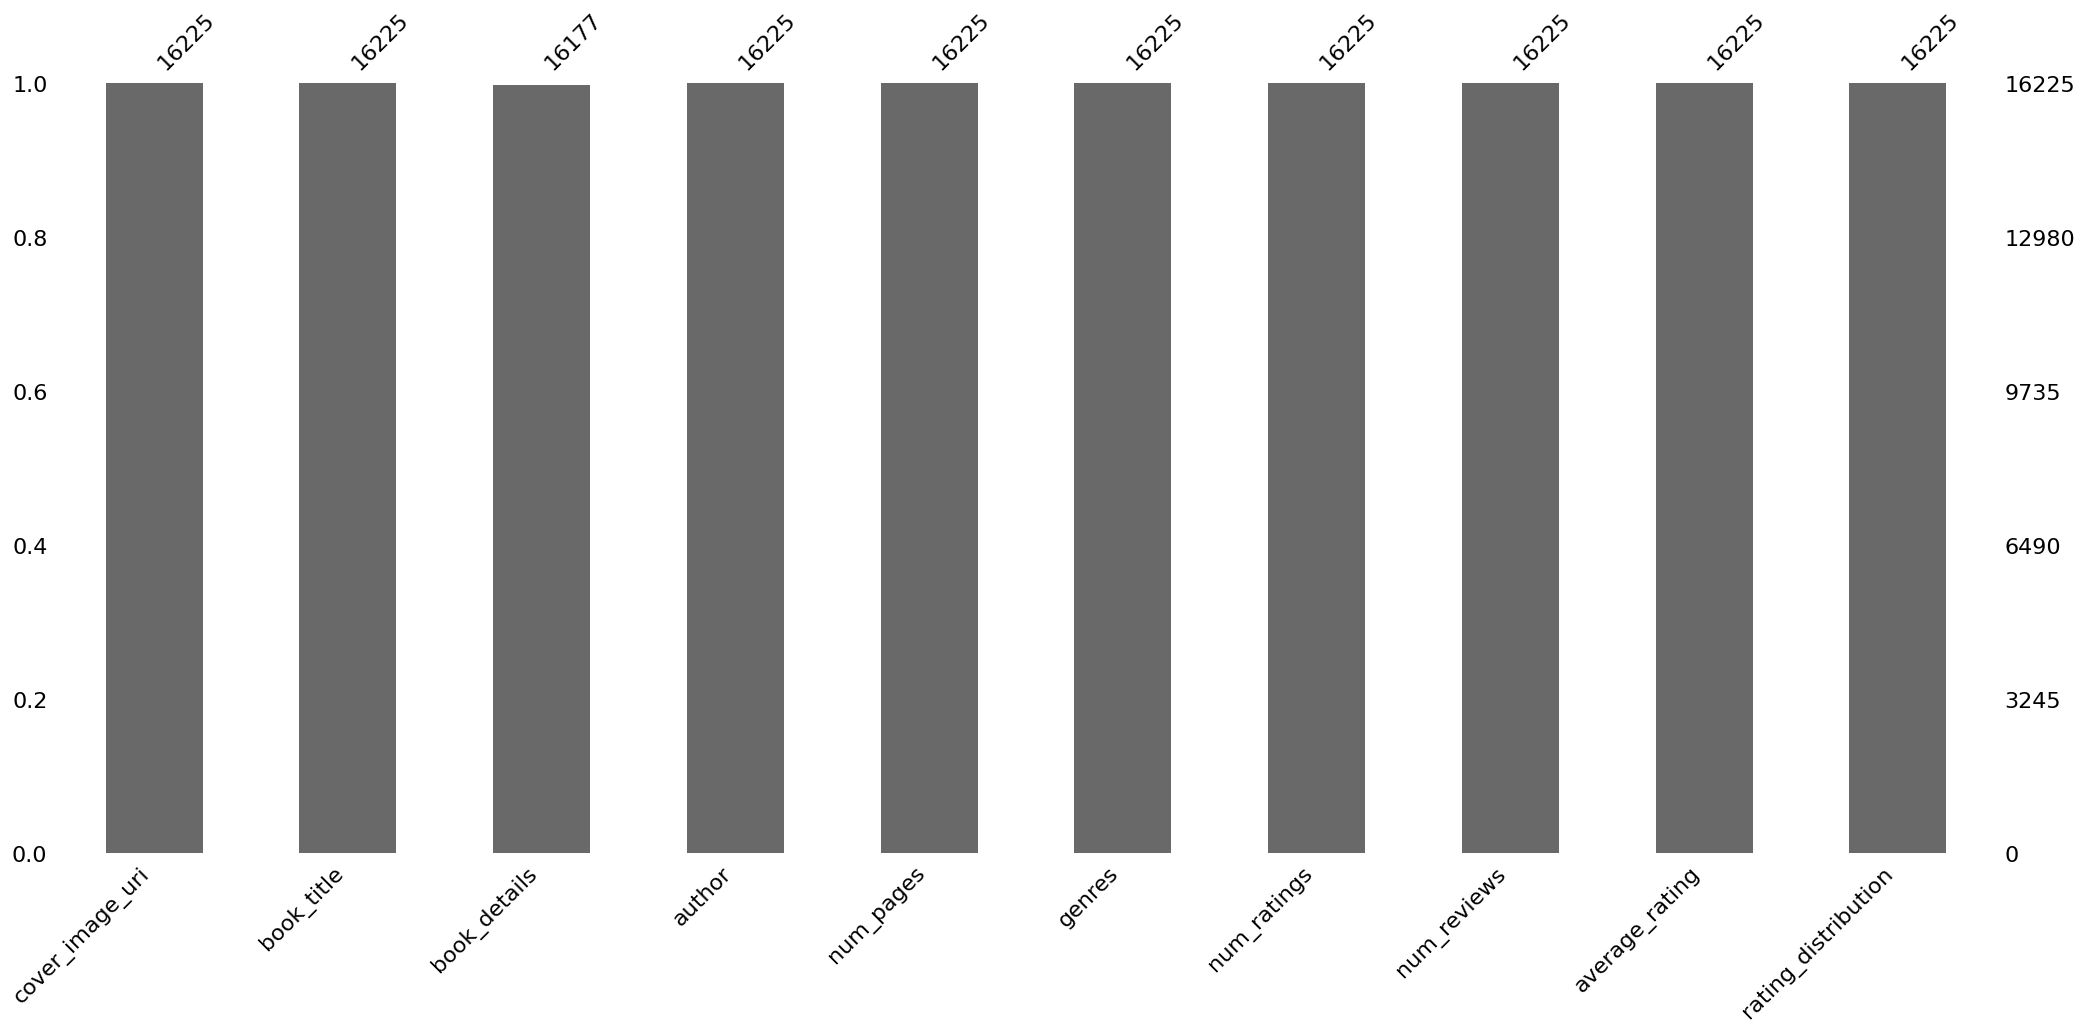

In [ ]:
msno.bar(data)

# Pre-procesado

## Separacion de Rating

### Funcion que saca el diccionario de la columna de rating, y crea una columna para cada rating

In [ ]:
def extract_ratings(rating_str):
  try:
    rating_dict = ast.literal_eval(rating_str)
    return {
        'rating_5': int(rating_dict.get('5', '0').replace(',', '')),
        'rating_4': int(rating_dict.get('4', '0').replace(',', '')),
        'rating_3': int(rating_dict.get('3', '0').replace(',', '')),
        'rating_2': int(rating_dict.get('2', '0').replace(',', '')),
        'rating_1': int(rating_dict.get('1', '0').replace(',', ''))
    }
  except:
    return {'rating_5': 0, 'rating_4': 0, 'rating_3': 0, 'rating_2': 0, 'rating_1': 0}


### se manda llamar la funcion y se llenan las columnas

In [ ]:
data[['rating_5', 'rating_4', 'rating_3', 'rating_2', 'rating_1']] = data['rating_distribution'].apply(extract_ratings).apply(pd.Series)

data.drop('rating_distribution', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cover_image_uri  16225 non-null  object 
 1   book_title       16225 non-null  object 
 2   book_details     16177 non-null  object 
 3   author           16225 non-null  object 
 4   num_pages        16225 non-null  object 
 5   genres           16225 non-null  object 
 6   num_ratings      16225 non-null  int64  
 7   num_reviews      16225 non-null  int64  
 8   average_rating   16225 non-null  float64
 9   rating_5         16225 non-null  int64  
 10  rating_4         16225 non-null  int64  
 11  rating_3         16225 non-null  int64  
 12  rating_2         16225 non-null  int64  
 13  rating_1         16225 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 1.7+ MB


## Numero de paginas

### funcion que elimina los corechetes de lista y retorna el numero de pagina en entero de la columna "num_page"


In [ ]:
def limpiar_num_pages(valor):
    valor_str = str(valor).strip("[]'").strip()
    if valor_str.lower() == 'None' or valor_str == '':
        return 0
    try:
        return int(valor_str)
    except:
      return 0

### se manda llamar la funcion y se aplica a la misma columna

In [ ]:
data['num_pages'] = data['num_pages'].apply(limpiar_num_pages)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cover_image_uri  16225 non-null  object 
 1   book_title       16225 non-null  object 
 2   book_details     16177 non-null  object 
 3   author           16225 non-null  object 
 4   num_pages        16225 non-null  int64  
 5   genres           16225 non-null  object 
 6   num_ratings      16225 non-null  int64  
 7   num_reviews      16225 non-null  int64  
 8   average_rating   16225 non-null  float64
 9   rating_5         16225 non-null  int64  
 10  rating_4         16225 non-null  int64  
 11  rating_3         16225 non-null  int64  
 12  rating_2         16225 non-null  int64  
 13  rating_1         16225 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.7+ MB


## Revisar como va quedando el DF

In [ ]:
data.sample(10)

,cover_image_uri,book_title,book_details,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1
9799,https://images-na.ssl-images-amazon.com/images...,Monty Python's Tunisian Holiday: My Life with ...,"In 1978, Kim “Howard” Johnson ran away to join...",Kim Howard Johnson,368,"['Nonfiction', 'Biography', 'Humor', 'Film', '...",216,48,3.31,21,77,75,35,8
10520,https://images-na.ssl-images-amazon.com/images...,The Philosopher and the Wolf,This fascinating book charts the relationship ...,Mark Rowlands,256,"['Philosophy', 'Nonfiction', 'Animals', 'Memoi...",3049,318,4.14,1316,1062,501,131,39
10986,https://images-na.ssl-images-amazon.com/images...,The Manufactured Identity,Months after his mysterious disappearance from...,Heath Sommer,308,"['Mystery', 'Psychology', 'Fiction', 'Thriller...",435,111,3.54,140,84,116,60,35
2672,https://images-na.ssl-images-amazon.com/images...,Tell No One,"For Dr. David Beck, the loss was shattering. A...",Harlan Coben,370,"['Mystery', 'Thriller', 'Fiction', 'Mystery Th...",162984,8151,4.08,59010,66488,30101,5587,1798
10356,https://images-na.ssl-images-amazon.com/images...,Nocturnes: Five Stories of Music and Nightfall,One of the most celebrated writers of our time...,Kazuo Ishiguro,221,"['Short Stories', 'Fiction', 'Music', 'Contemp...",28236,3019,3.51,4030,10083,10780,2884,459
299,https://images-na.ssl-images-amazon.com/images...,The Sea,The author of The Untouchable (“contemporary f...,John Banville,195,"['Fiction', 'Ireland', 'Irish Literature', 'Li...",31919,3305,3.55,6909,10452,9230,3793,1535
11458,https://images-na.ssl-images-amazon.com/images...,Himnaríki og helvíti,"Sagan gerist fyrir meira en hundrað árum, vest...",Jón Kalman Stefánsson,214,"['Fiction', 'Historical Fiction', 'Contemporar...",6016,884,4.17,2607,2165,939,243,62
13908,https://images-na.ssl-images-amazon.com/images...,Happily Ever After,The contents of Happily Ever After are as foll...,Kiera Cass,416,"['Romance', 'Young Adult', 'Dystopia', 'Fantas...",70378,4934,4.06,27030,24696,14876,3056,720
943,https://images-na.ssl-images-amazon.com/images...,Insomnia,"Ralph Roberts, a sus setenta años y tras la mu...",Stephen King,896,"['Horror', 'Fiction', 'Fantasy', 'Thriller', '...",156830,4864,3.83,49950,51242,39356,12135,4147
12768,https://images-na.ssl-images-amazon.com/images...,Malice,A black sun is rising … Young Corban watches e...,John Gwynne,672,"['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...",39975,4531,4.17,16670,16031,5358,1347,569


## Género (Encoding)

### Funcion: que saca una lista de generos que no se pueden repetir por el uso del set, le quita los espacios antes y despues para que quede limpio

In [ ]:
def clean_data(data):
  genre_set = set()
  for genres_str in data:
      try:
        genres_list = ast.literal_eval(genres_str)
        # Crear una lista nueva
        clean_genres = []
        for g in genres_list:
          # Eliminar espacios antes y después del texto
          clean_genres.append(g.strip())

          # Agregar todos los géneros limpios al conjunto
          genre_set.update(clean_genres)
      except:
        genre_set.add('Unknown')
  return list(genre_set)

### se manda llamar la funcion para limpiar los generos y se organizan alfabeticamente con Sort()

In [ ]:
genre = clean_data(data['genres'])
genre.sort()
len(genre)

728

### hacer el hot encoder para mis generos

poner 1 y 0 para saber si tiene o no el género

In [ ]:
def hot_encoder(data, genre):
  for g in genre:
    data[g] = data['genres'].apply(lambda x: 1 if g in x else 0)
  return data

In [ ]:
data = hot_encoder(data, genre)
data.drop('genres', axis=1, inplace=True)
data.info()

<ipython-input-29-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[g] = data['genres'].apply(lambda x: 1 if g in x else 0)
<ipython-input-29-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[g] = data['genres'].apply(lambda x: 1 if g in x else 0)
<ipython-input-29-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Columns: 741 entries, cover_image_uri to Zombies
dtypes: float64(1), int64(736), object(4)
memory usage: 91.7+ MB


<ipython-input-29-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[g] = data['genres'].apply(lambda x: 1 if g in x else 0)
<ipython-input-29-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[g] = data['genres'].apply(lambda x: 1 if g in x else 0)
<ipython-input-29-f3659692d1e4>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

## Checar como va quedando

In [ ]:
data.sample(5).T

,6928,15877,9655,5414,13496
cover_image_uri,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...
book_title,The Howling,The Maid's Diary,Hate That Cat,Air,I Too Had a Love Story
book_details,An alternative cover edition for this ISBN can...,Kit Darling is a maid with a snooping problem....,Jack Room 204—Miss Stretchberry February 2...,Chung Mae is the only connection her small far...,Do love stories ever die? Can modern day gadge...
author,Gary Brandner,Loreth Anne White,Sharon Creech,Geoff Ryman,Ravinder Singh
num_pages,215,369,160,400,212
...,...,...,...,...,...
Young Adult Historical Fiction,0,0,0,0,0
Young Adult Paranormal,0,0,0,0,0
Young Adult Romance,0,0,0,0,0
Zimbabwe,0,0,0,0,0


## Autor

### Contar cuántos libros ha escrito cada autor para ver si vale la pena hacer un encoding de los autores


In [ ]:
libros_por_autor = data['author'].value_counts().reset_index()
libros_por_autor.columns = ['author', 'book_count']
libros_por_autor['percentage(%)'] = (libros_por_autor['book_count'] / libros_por_autor['book_count'].sum()) * 100
libros_por_autor.sort_values(by='book_count', ascending=False, inplace=True)

libros_por_autor.head(10)

,author,book_count,percentage(%)
0,Stephen King,79,0.486903
2,Agatha Christie,48,0.295840
1,Danielle Steel,48,0.295840
3,Sylvia Browne,43,0.265023
4,Terry Pratchett,42,0.258860
6,Rick Riordan,39,0.240370
5,James Patterson,39,0.240370
7,Sarah J. Maas,38,0.234206
8,Neil Gaiman,36,0.221880
9,Julie Mannino,34,0.209553


## Pasar el DF limpio a un CSV

In [ ]:
data.to_csv('data_clean.csv', index=False)

# Separar el Data Frame:

## Divide en 80% training y 20% testing

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_data.sample(5).T

,11435,6558,15215,1460,7095
cover_image_uri,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...
book_title,De tijd die nodig is,Change Your Thoughts - Change Your Life,The Hand on the Wall,The Husband,The Milkweed Prophesy: Epitaph of the Apocalypse
book_details,Tijdens een zakenreis krijgt een achtenveertig...,"Five hundred years before the birth of Jesus, ...",Ellingham Academy must be cursed. Three people...,What would you do for love? Would you die? Wou...,THE MILKWEED PROPHESY;EPITAPH OF THE APOCALYPS...
author,Jens Christian Grøndahl,Wayne W. Dyer,Maureen Johnson,Dean Koontz,Lama Milkweed L. Augustine
num_pages,319,392,369,322,280
...,...,...,...,...,...
Young Adult Historical Fiction,0,0,0,0,0
Young Adult Paranormal,0,0,0,0,0
Young Adult Romance,0,0,0,0,0
Zimbabwe,0,0,0,0,0


# Escalamiento

## preparar df para escalarlo eliminando columnas no numericas:

In [ ]:
columns_drop = ['cover_image_uri', 'book_title', 'book_details', 'author']

train = train_data.drop(columns_drop, axis=1)
test = test_data.drop(columns_drop, axis=1)

## hacer Standar Scalation en los datos  de test y train

In [ ]:
# Inicializar y ajustar el StandardScaler
scaler = StandardScaler()

#escalamiento
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Convertir los arrays escalados de nuevo a DataFrames para mejor manejo
train_scaled_df = pd.DataFrame(train_scaled, columns=train.columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=test.columns, index=test.index)

In [ ]:
train_scaled_df.sample(5).T

,10300,6633,11631,14105,4453
num_pages,0.450972,-0.763504,0.193836,-0.581530,-0.015830
num_ratings,-0.197609,-0.224207,0.102073,-0.147716,-0.201294
num_reviews,-0.203767,-0.286968,-0.085035,-0.094265,-0.290066
average_rating,-0.924663,-0.348400,0.531158,-1.804221,-1.045981
rating_5,-0.195536,-0.200297,0.120825,-0.180895,-0.199102
...,...,...,...,...,...
Young Adult Historical Fiction,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778
Young Adult Paranormal,-0.012414,-0.012414,-0.012414,-0.012414,-0.012414
Young Adult Romance,-0.043929,-0.043929,-0.043929,-0.043929,-0.043929
Zimbabwe,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778


## juntar los df esclados con las columnas no numericas

In [ ]:
new_scaled_train = train_scaled_df.join(train_data[columns_drop])
new_scaled_test = test_scaled_df.join(test_data[columns_drop])

In [ ]:
new_scaled_test.sample(5).T

,5587,15435,4861,2298,4046
num_pages,-0.56175,0.174056,0.597342,0.308558,1.329193
num_ratings,-0.251276,-0.201287,-0.209842,0.143907,-0.161832
num_reviews,-0.302331,-0.026807,-0.288865,0.30663,-0.219383
average_rating,-1.167299,-0.773015,0.318851,-0.318071,0.37951
rating_5,-0.224015,-0.199026,-0.18422,0.048335,-0.146789
...,...,...,...,...,...
Zombies,-0.060924,-0.060924,-0.060924,-0.060924,-0.060924
cover_image_uri,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...
book_title,The Simulacra,Instant Karma,Area 7,One Thousand White Women: The Journals of May ...,Night Fall
book_details,"Set in the middle of the twenty-first century,...",Chronic overachiever Prudence Barnett is alway...,Matthew Reilly dazzled the world with his elec...,One Thousand White Women is the story of May D...,"Based on true events, but unlike anything you'..."


# Converitr los DF a CSV

In [ ]:
train_scaled_df.to_csv('train_scaled.csv', index=False)
test_scaled_df.to_csv('test_scaled.csv', index=False)

new_scaled_train.to_csv('train_data.csv', index=False)
new_scaled_test.to_csv('test_data.csv', index=False)